# Bienvenido a la entrega final del curso Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos

In [73]:
#Cargamos las librerías necesarias

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import sys
import numpy as np

In [74]:
# Cargamos el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [75]:
# Guardar una copia de las imágenes originales antes de la normalización
x_train_original = x_train.copy()
x_test_original = x_test.copy()


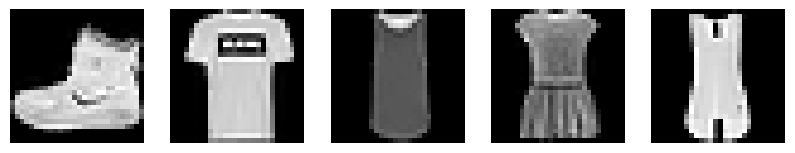

In [76]:
# Normalizamos los datos
x_train, x_test = x_train / 255.0, x_test / 255.0  

# Mostramos algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

### Consignas para el proyecto:

##### Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
##### Reordena las capas del modelo para que coincidan con el modelo correcto.
##### Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
##### Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
##### Calcula el accuracy del modelo corregido.
##### PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
##### PS2: para el entrenamiento no más de 5 épocas y validarlo.

### Capas a usar:

##### Dense(10, activation='softmax')
##### Dense(256, activation='relu'),
##### Dropout(0.2),
##### Dropout(0.2),
##### Dense(128, activation='relu'),
##### Flatten(input_shape=(28, 28)),
##### Dense(512, activation='relu'),

### Explicación para los alumnos:
##### Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
##### Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
##### Además, emplea Dropout para reducir el sobreajuste.

In [77]:
# Definimos modelo el modelo
model = Sequential([
    Flatten(input_shape=(28, 28, 1 )),  # Convertimos la imagen 28x28 en un vector de 784 elementos
    Dense(512, activation='relu'),  # Primera capa oculta con 512 neuronas y activación ReLU
    Dropout(0.2),  # Regularización para evitar overfitting
    Dense(256, activation='relu'),  # Segunda capa oculta con 256 neuronas y activación ReLU
    Dropout(0.2),  # Otra capa de Dropout para más regularización
    Dense(128, activation='relu'),  # Tercera capa oculta con 128 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas para clasificación
])

# Mostramos la estructura del modelo
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo con 5 épocas
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluamos el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Mostramos la precisión final
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7555 - loss: 0.6638 - val_accuracy: 0.8423 - val_loss: 0.4333
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8478 - loss: 0.4127 - val_accuracy: 0.8491 - val_loss: 0.4236
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8612 - loss: 0.3736 - val_accuracy: 0.8595 - val_loss: 0.3793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8710 - loss: 0.3508 - val_accuracy: 0.8735 - val_loss: 0.3634
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8782 - loss: 0.3334 - val_accuracy: 0.8673 - val_loss: 0.3637
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.3596
Test Accuracy: 86.73%


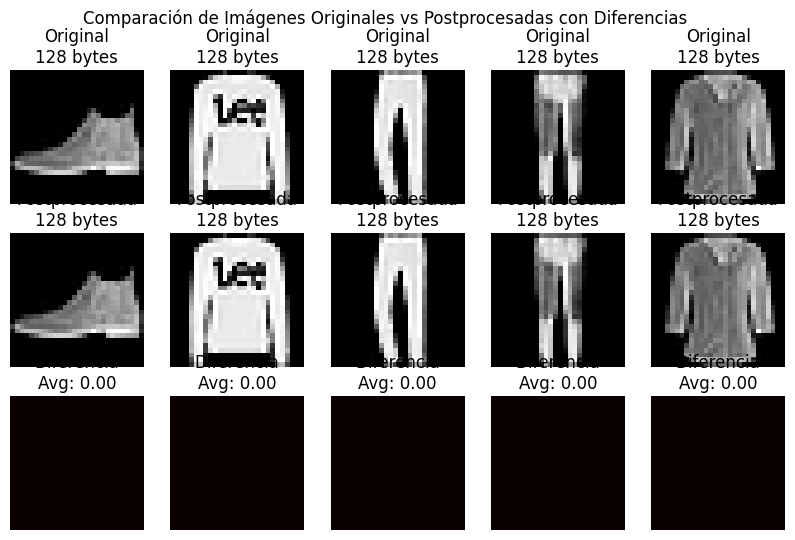

Tamaño en memoria de las imágenes originales: 7840144 bytes
Tamaño en memoria de las imágenes postprocesadas: 62720144 bytes


In [86]:


# Comparar imágenes originales vs postprocesadas con tamaño en memoria y diferencias numéricas
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i in range(5):
    original_size = sys.getsizeof(x_test_original[i])
    processed_size = sys.getsizeof(x_test[i])
    difference = np.abs(x_test_original[i] - (x_test[i] * 255))
    avg_difference = np.mean(difference)
    
    # Imágenes originales
    axes[0, i].imshow(x_test_original[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Original\n{original_size} bytes")
    
    # Imágenes postprocesadas (normalizadas)
    axes[1, i].imshow(x_test[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Postprocesada\n{processed_size} bytes")
    
    # Diferencia absoluta
    axes[2, i].imshow(difference, cmap='hot')
    axes[2, i].axis('off')
    axes[2, i].set_title(f"Diferencia\nAvg: {avg_difference:.2f}")

plt.suptitle("Comparación de Imágenes Originales vs Postprocesadas con Diferencias")
plt.show()

# Calcular el tamaño en memoria de las imágenes originales y postprocesadas
original_size = sys.getsizeof(x_test_original)
processed_size = sys.getsizeof(x_test)

print(f"Tamaño en memoria de las imágenes originales: {original_size} bytes")
print(f"Tamaño en memoria de las imágenes postprocesadas: {processed_size} bytes")